In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
import nanonets
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from scipy.optimize import curve_fit
from scipy.special import gamma
plt.style.use(["science","bright","grid"])

cm  = plt.get_cmap('cividis')
ma  = ["o","s","^","v","<",">"]

## DC Input - Voltage Distribution - Closed Circuit

In [42]:
def shift_and_append(dfs_dict,col=1):
    for name, df in dfs_dict.items():
        col1 = df.pop(f"{col}")
        df.columns = range(df.shape[1])
        df[len(df.columns)] = col1
    return dfs_dict

def drop_columns(dfs_dict):
    for name, df in dfs_dict.items():
        df = df.drop(columns=[1,2,3,4,5,6])
        df.columns = range(df.shape[1])
        dfs_dict[name] = df
    return dfs_dict

folder      = "/home/j/j_mens07/phd/data/2_funding_period/potential/wo_magic_cable/dc_input_vs_volt/"
U0_vals     = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]
N_p         = 9
N_particles = N_p*N_p
N_voltages  = 50000
t_vals      = np.arange(N_voltages-1)*1e-10*1e9
np_idx      = [5+9*i for i in range(N_p)]+[82]

pot_2       = {U_0 : pd.read_csv(f"{folder}mean_state_Nx={N_p}_Ny={N_p}_Ne=2_{U_0:.3f}.csv").round(5) for U_0 in U0_vals}
pot_2       = shift_and_append(pot_2)
pot_eq_2    = pd.DataFrame([pot_2[U_0].iloc[48000:,:].mean().values / U_0 for U_0 in U0_vals],index=U0_vals).T.round(2)

pot_8       = {U_0 : pd.read_csv(f"{folder}mean_state_Nx={N_p}_Ny={N_p}_Ne=8_{U_0:.3f}.csv").round(5) for U_0 in U0_vals}
pot_8       = shift_and_append(pot_8, col=7)
pot_8       = drop_columns(pot_8)
pot_eq_8    = pd.DataFrame([pot_8[U_0].iloc[48000:,:].mean().values / U_0 for U_0 in U0_vals],index=U0_vals).T.round(2)

## Output Potential

In [51]:
output_2 = {U_0 : pd.read_csv(f"{folder}Nx={N_p}_Ny={N_p}_Ne=2_{U_0:.3f}.csv").round(5)['Observable'].values for U_0 in U0_vals}
output_8 = {U_0 : pd.read_csv(f"{folder}Nx={N_p}_Ny={N_p}_Ne=8_{U_0:.3f}.csv").round(5)['Observable'].values for U_0 in U0_vals}

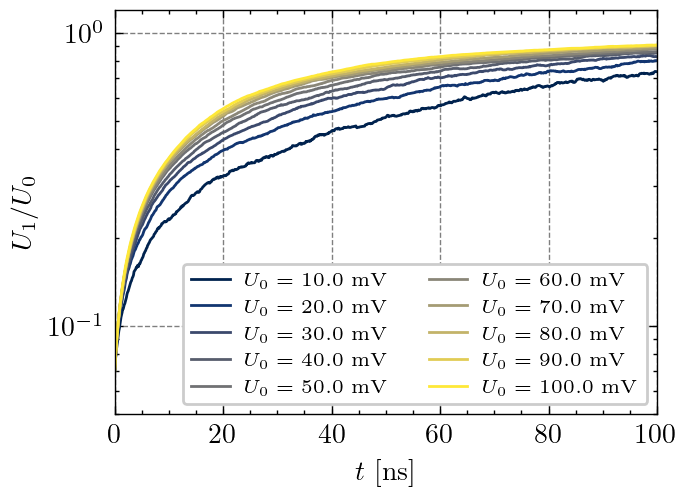

In [64]:
fig     = plt.figure(dpi=200)
ax      = fig.add_subplot()
norm    = Normalize(vmin=U0_vals[0], vmax=U0_vals[-1])
for U_0 in U0_vals:
    ax.plot(t_vals, output_2[U_0]/U_0, label=f'$U_0 = {U_0*1000}$ mV', color=cm(norm(U_0)))
ax.legend(fontsize='x-small', ncol=2)
ax.set_ylabel("$U_1/U_0$")
ax.set_xlabel("$t$ [ns]")
ax.set_xlim(0,100)
ax.set_ylim(0.05,1.2)
ax.set_yscale('log')

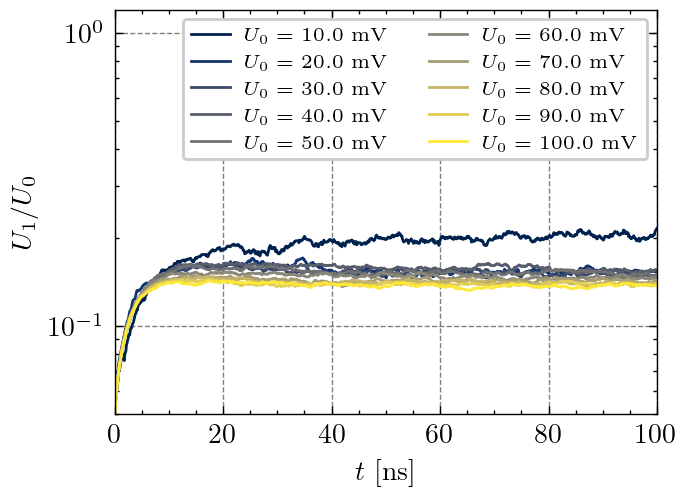

In [63]:
fig     = plt.figure(dpi=200)
ax      = fig.add_subplot()
norm    = Normalize(vmin=U0_vals[0], vmax=U0_vals[-1])
for U_0 in U0_vals:
    ax.plot(t_vals, output_8[U_0]/U_0, label=f'$U_0 = {U_0*1000}$ mV', color=cm(norm(U_0)))
ax.legend(fontsize='x-small', ncol=2)
ax.set_ylabel("$U_1/U_0$")
ax.set_xlabel("$t$ [ns]")
ax.set_xlim(0,100)
ax.set_ylim(0.05,1.2)
ax.set_yscale('log')

## Potential Curves

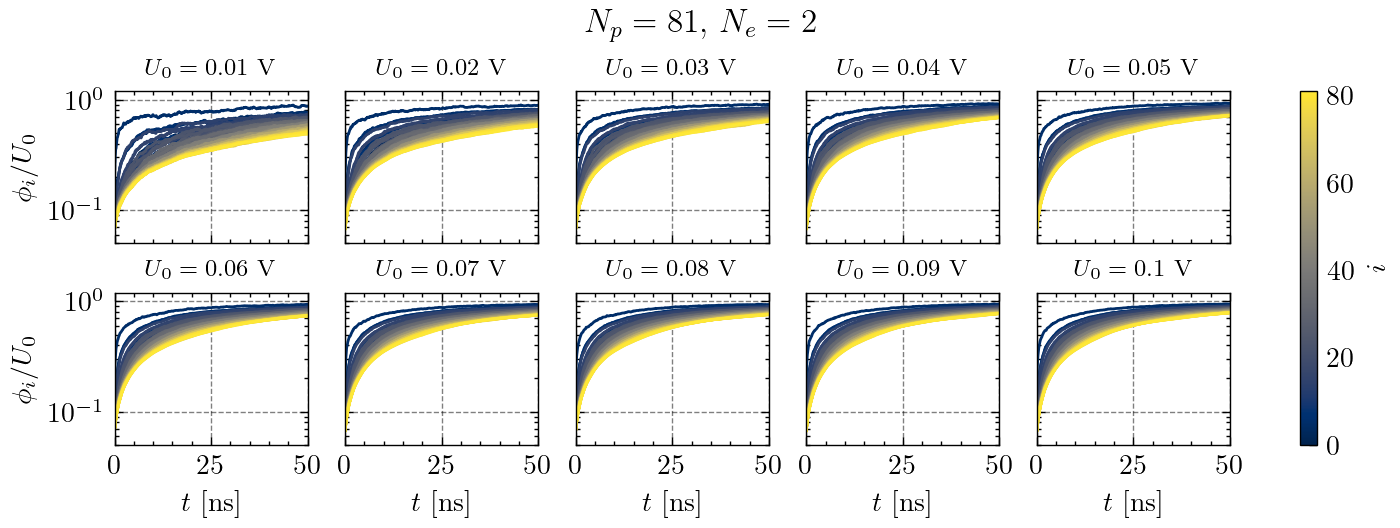

In [43]:
fig     = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
norm    = Normalize(vmin=0, vmax=81)
all_ax  = []

for n, U_0 in enumerate(U0_vals):
    ax = fig.add_subplot(2,5,n+1)
    all_ax.append(ax)
    for i in range(1,N_particles+1):
        ax.plot(t_vals, pot_2[U_0][i].values/U_0, color=cm(norm(i)))
    ax.set_title(f"$U_0 = {U_0}$ V", fontsize='small')
    ax.set_xlim(0,50)
    ax.set_ylim(0.05,1.2)
    ax.set_yscale('log')
    
    if n % 5 == 0:
        ax.set_ylabel("$\phi_i / U_0$")
    else:
        ax.set_yticklabels("")
    if n >= 5:
        ax.set_xlabel("$t$ [ns]")
    else:
        ax.set_xticklabels("")

sm  = ScalarMappable(cmap=cm, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=all_ax)
cbar.set_label("$i$")
_ = fig.suptitle("$N_p = 81$, $N_e = 2$")

# fig.savefig("../plots/dc_input/linear/closed_circuit_node_time_series.svg", transparent=True)

Text(0.5, 0.98, '$N_p = 81$, $N_e = 8$')

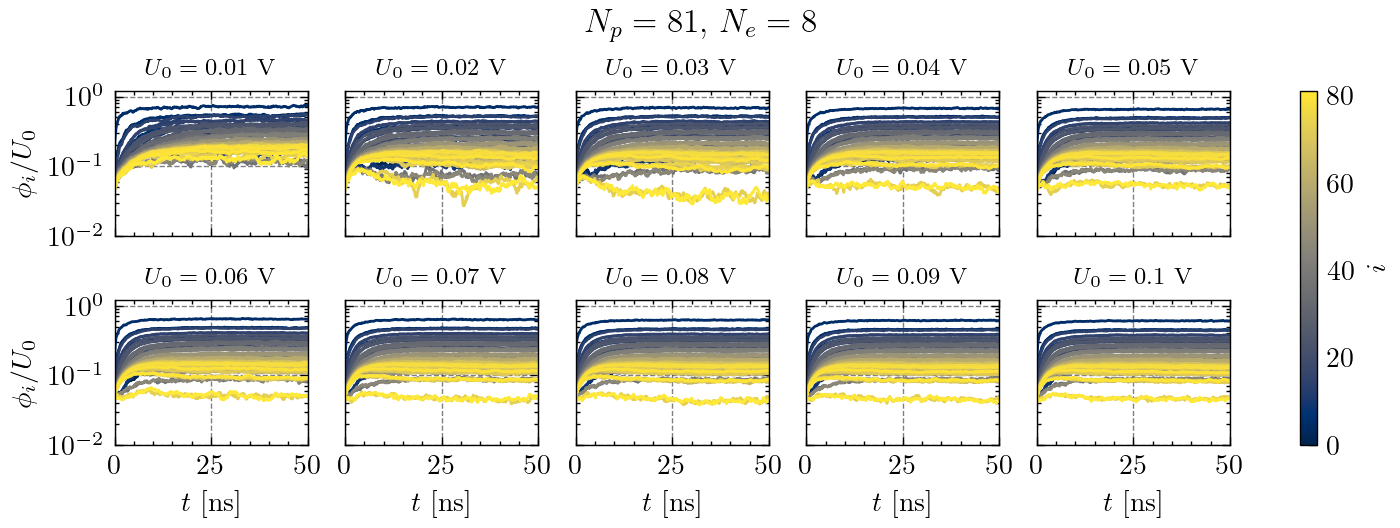

In [44]:
fig     = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
norm    = Normalize(vmin=0, vmax=81)
all_ax  = []

for n, U_0 in enumerate(U0_vals):
    ax = fig.add_subplot(2,5,n+1)
    all_ax.append(ax)
    for i in range(1,N_particles+1):
        ax.plot(t_vals, pot_8[U_0][i].values/U_0, color=cm(norm(i)))
    ax.set_title(f"$U_0 = {U_0}$ V", fontsize='small')
    ax.set_xlim(0,50)
    ax.set_ylim(0.01,1.2)
    ax.set_yscale('log')
    
    if n % 5 == 0:
        ax.set_ylabel("$\phi_i / U_0$")
    else:
        ax.set_yticklabels("")
    if n >= 5:
        ax.set_xlabel("$t$ [ns]")
    else:
        ax.set_xticklabels("")

sm  = ScalarMappable(cmap=cm, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=all_ax)
cbar.set_label("$i$")
fig.suptitle("$N_p = 81$, $N_e = 8$")

# fig.savefig("../plots/dc_input/linear/closed_circuit_node_time_series.svg", transparent=True)

## Potential Correlation

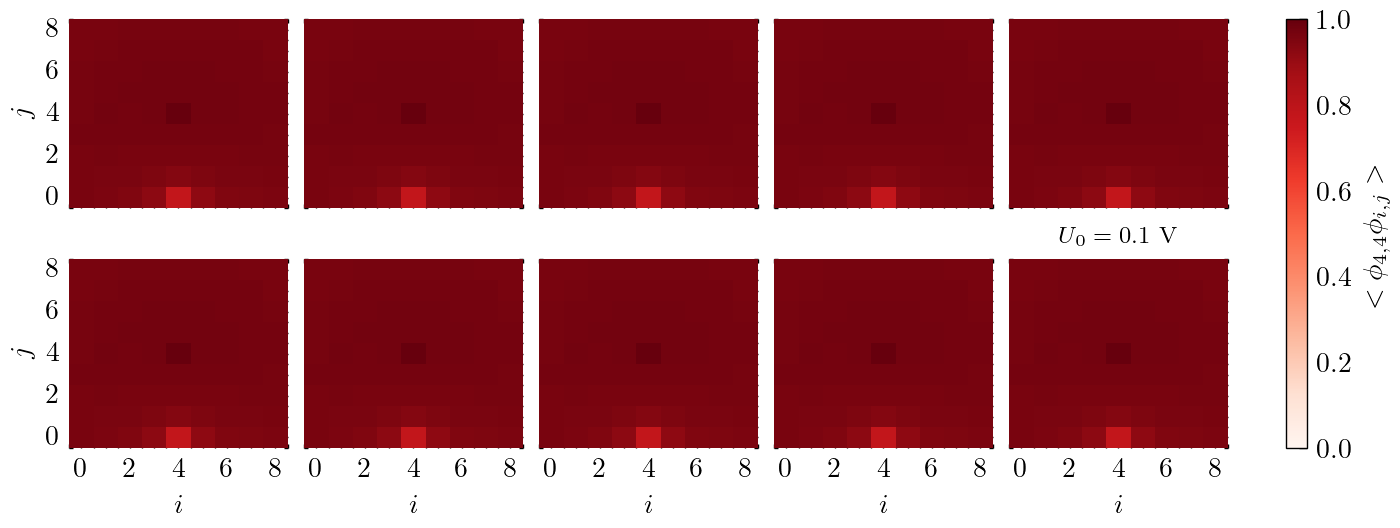

In [45]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
all_ax  = []
norm    = Normalize(vmin=0, vmax=1)
for n, U_0 in enumerate(U0_vals):
    ax  = fig.add_subplot(2,5,n+1)
    arr = pot_2[0.01].drop(columns=[0,82]).corr().iloc[:,N_particles//2].values.reshape(N_p,-1)
    ax = sns.heatmap(arr, cmap='Reds', vmin=0, vmax=1, cbar=False)
    _  = plt.yticks(rotation=0)
    ax.invert_yaxis()
    all_ax.append(ax)
    if n % 5 == 0:
        ax.set_ylabel("$j$")
    else:
        ax.set_yticklabels("")
    if n >= 5:
        ax.set_xlabel("$i$")
    else:
        ax.set_xticklabels("")

ax.set_title(f"$U_0 = {U_0}$ V", fontsize='small')

sm  = ScalarMappable(cmap='Reds', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=all_ax)
cbar.set_label("$<\phi_{4,4}\phi_{i,j}>$")

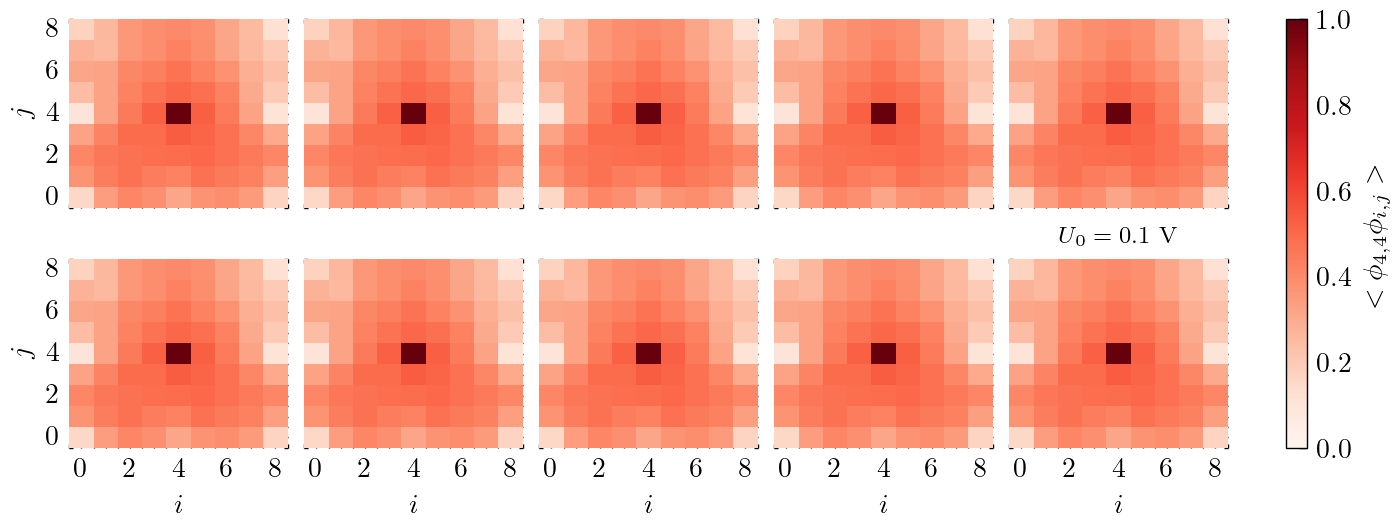

In [46]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
all_ax  = []
norm    = Normalize(vmin=0, vmax=1)
for n, U_0 in enumerate(U0_vals):
    ax  = fig.add_subplot(2,5,n+1)
    arr = pot_8[0.01].drop(columns=[0,82]).corr().iloc[:,N_particles//2].values.reshape(N_p,-1)
    ax = sns.heatmap(arr, cmap='Reds', vmin=0, vmax=1, cbar=False)
    _  = plt.yticks(rotation=0)
    ax.invert_yaxis()
    all_ax.append(ax)
    if n % 5 == 0:
        ax.set_ylabel("$j$")
    else:
        ax.set_yticklabels("")
    if n >= 5:
        ax.set_xlabel("$i$")
    else:
        ax.set_xticklabels("")

ax.set_title(f"$U_0 = {U_0}$ V", fontsize='small')

sm  = ScalarMappable(cmap='Reds', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=all_ax)
cbar.set_label("$<\phi_{4,4}\phi_{i,j}>$")

## Characteristic Time Scale @ Potentials

In [138]:
p_vals_2, cov_vals_2 = {}, {}
p0, p1 = 0.2, 0.9
for U_0 in U0_vals:
    p_tmp, cov_tmp = [], []
    for k in range(1, N_particles+1):

        x       = t_vals.copy()
        y       = pot_2[U_0].loc[:,k].values
        y_max   = np.mean(y[-5000:])
        def func(t, tau, a0):
            return y_max - a0*np.exp(-t/tau)
        
        t0      = np.argmax(y>p0*y_max)
        t1      = np.argmax(y>p1*y_max)
        x_fit   = x.copy()[t0:t1]
        y_fit   = y.copy()[t0:t1]
        p, cov  = curve_fit(func, x_fit, y_fit, p0=[50,y_max], bounds=((0,0),(np.inf,np.inf)))

        p_tmp.append(p)
        cov_tmp.append(cov)
    p_vals_2[U_0] = np.array(p_tmp)
    cov_vals_2[U_0] = np.array(cov_tmp)

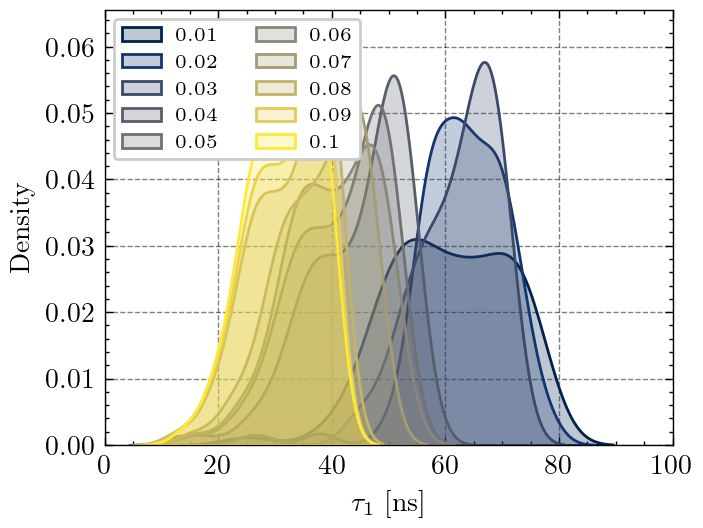

In [139]:
fig = plt.figure(dpi=200, layout='constrained')
norm = Normalize(vmin=U0_vals[0], vmax=U0_vals[-1])
ax  = fig.add_subplot()

for U_0 in U0_vals:
    arr = p_vals_2[U_0][:,0].copy()
    ax  = sns.kdeplot(arr, color=cm(norm(U_0)), fill=True, bw_adjust=1, cumulative=False)
    ax.set_xlabel("$\\tau_1$ [ns]")

ax.set_xlim(0,100)
ax.legend(U0_vals, ncol=2, loc='upper left', fontsize='x-small')

In [140]:
p_vals_8, cov_vals_8 = {}, {}
p0, p1 = 0.2, 0.9
for U_0 in U0_vals:
    p_tmp, cov_tmp = [], []
    for k in range(1, N_particles+1):

        x       = t_vals.copy()
        y       = pot_8[U_0].loc[:,k].values
        y_max   = np.mean(y[-5000:])
        def func(t, tau, a0):
            return y_max - a0*np.exp(-t/tau)
        
        t0      = np.argmax(y>p0*y_max)
        t1      = np.argmax(y>p1*y_max)
        x_fit   = x.copy()[t0:t1]
        y_fit   = y.copy()[t0:t1]
        try:
            p, cov  = curve_fit(func, x_fit, y_fit, p0=[5,y_max], bounds=((0,0),(np.inf,np.inf)))
        except:
            p   = np.array([np.nan,np.nan])
            cov = np.array([[np.nan,np.nan],[np.nan,np.nan]])
        p_tmp.append(p)
        cov_tmp.append(cov)
    p_vals_8[U_0] = np.array(p_tmp)
    cov_vals_8[U_0] = np.array(cov_tmp)

/tmp/ipykernel_13123/3194368290.py:18: OptimizeWarning: Covariance of the parameters could not be estimated
  p, cov  = curve_fit(func, x_fit, y_fit, p0=[5,y_max], bounds=((0,0),(np.inf,np.inf)))


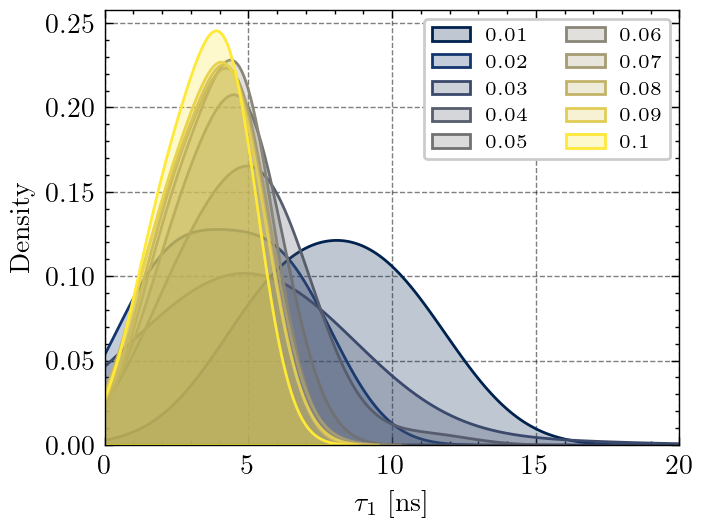

In [141]:
fig = plt.figure(dpi=200, layout='constrained')
norm = Normalize(vmin=U0_vals[0], vmax=U0_vals[-1])
ax  = fig.add_subplot()

for U_0 in U0_vals:
    arr = p_vals_8[U_0][:,0].copy()
    ax  = sns.kdeplot(arr, color=cm(norm(U_0)), fill=True, bw_adjust=2, cumulative=False)
    ax.set_xlabel("$\\tau_1$ [ns]")

ax.set_xlim(0,20)
ax.legend(U0_vals, ncol=2, loc='upper right', fontsize='x-small')

## Characteristic Time Scale @ Output

In [143]:
p_vals_2, cov_vals_2 = [], []
p0, p1 = 0.2, 0.9
for U_0 in U0_vals:

    x       = t_vals.copy()
    y       = output_2[U_0]
    y_max   = np.mean(y[-5000:])
    def func(t, tau, a0):
        return y_max - a0*np.exp(-t/tau)
    
    t0      = np.argmax(y>p0*y_max)
    t1      = np.argmax(y>p1*y_max)
    x_fit   = x.copy()[t0:t1]
    y_fit   = y.copy()[t0:t1]
    p, cov  = curve_fit(func, x_fit, y_fit, p0=[5,y_max], bounds=((0,0),(np.inf,np.inf)))

    p_vals_2.append(p)
    cov_vals_2.append(cov)
p_vals_2 = np.array(p_vals_2)
cov_vals_2 = np.array(cov_vals_2)

Text(0, 0.5, '$\\tau_1$ [ns]')

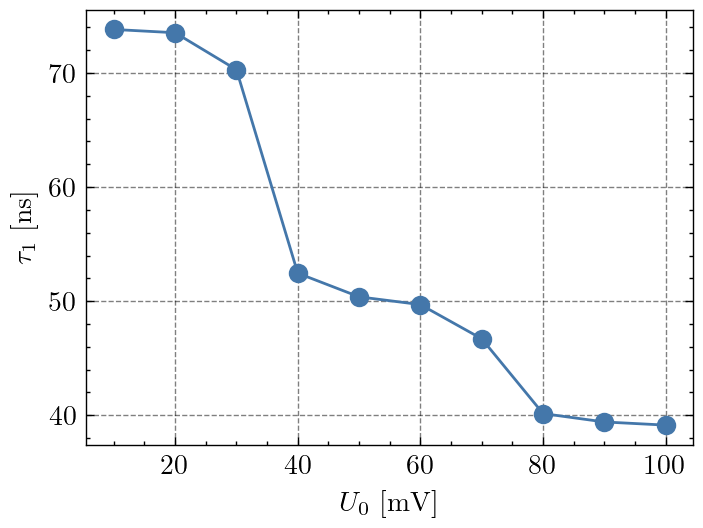

In [144]:
fig = plt.figure(dpi=200, layout='constrained')
ax  = fig.add_subplot()
ax.plot(np.array(U0_vals)*1000, p_vals_2[:,0], 'o-')
ax.set_xlabel("$U_0$ [mV]")
ax.set_ylabel("$\\tau_1$ [ns]")

In [145]:
p_vals_8, cov_vals_8 = [], []
p0, p1 = 0.2, 0.9
for U_0 in U0_vals:

    x       = t_vals.copy()
    y       = output_8[U_0]
    y_max   = np.mean(y[-5000:])
    def func(t, tau, a0):
        return y_max - a0*np.exp(-t/tau)
    
    t0      = np.argmax(y>p0*y_max)
    t1      = np.argmax(y>p1*y_max)
    x_fit   = x.copy()[t0:t1]
    y_fit   = y.copy()[t0:t1]
    p, cov  = curve_fit(func, x_fit, y_fit, p0=[5,y_max], bounds=((0,0),(np.inf,np.inf)))

    p_vals_8.append(p)
    cov_vals_8.append(cov)
p_vals_8 = np.array(p_vals_8)
cov_vals_8 = np.array(cov_vals_8)

Text(0, 0.5, '$\\tau_1$ [ns]')

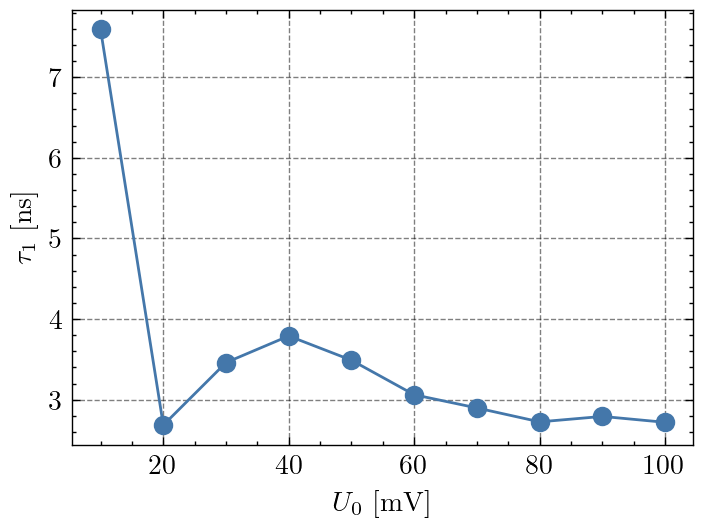

In [146]:
fig = plt.figure(dpi=200, layout='constrained')
ax  = fig.add_subplot()
ax.plot(np.array(U0_vals)*1000, p_vals_8[:,0], 'o-')
ax.set_xlabel("$U_0$ [mV]")
ax.set_ylabel("$\\tau_1$ [ns]")